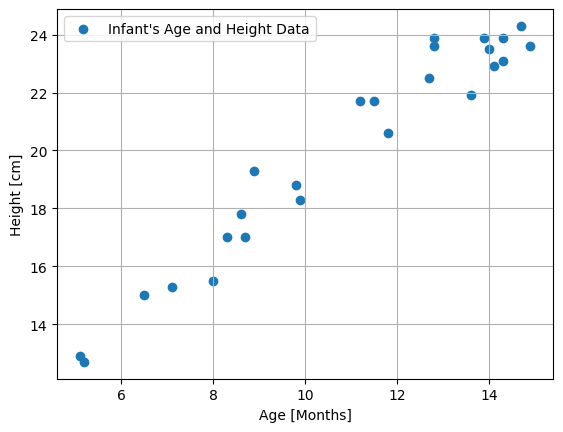

In [8]:
# 실습 1 - 제공된 데이터 파일을 불러들여 x축은 나이, y축은 키를 나타내는 2차원 평면에 각 데이터의 위치를 점으로 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CSV 파일을 읽어 Pandas DataFrame으로 변환
raw_data = pd.read_csv("C:/Coding/Python/machine_learning/week7/lin_regression_data_03.csv", names=['age', 'height'])

# raw_data
age = raw_data['age'].to_numpy()
height = raw_data['height'].to_numpy()

# plot
plt.scatter(age, height, label="Infant's Age and Height Data")
plt.xlabel('Age [Months]')
plt.ylabel('Height [cm]')
plt.grid()
plt.legend() 

plt.show()

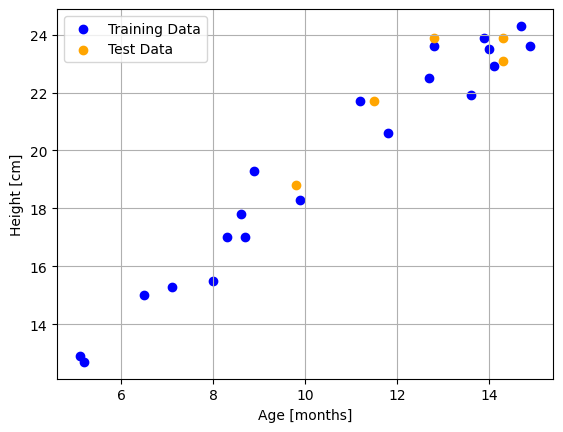

In [8]:
# 실습 2 - 전체 데이터 중20(1번~20번)를 훈련 집합(S)으로 후반 5개(21번~~25번)를 테스트 집합(T)으로 나누고 각 집합의 데이터를 그래프로 표시

# 총 데이터 크기를 구하고 교육 및 테스트 데이터 크기 계산
data_size = raw_data.shape[0]
train_size = int(0.8 * data_size)  # training data -> 80%
test_size = data_size - train_size # test data -> 20%

# training, test data 구분
train_data = raw_data[:train_size]
test_data = raw_data[train_size:]

# 나이 및 키 데이터 추출
train_age = train_data['age'].to_numpy()
train_height = train_data['height'].to_numpy()

test_age = test_data['age'].to_numpy()
test_height = test_data['height'].to_numpy()

# plot

plt.scatter(train_age, train_height, color='blue', label='Training Data')  # Training data
plt.scatter(test_age, test_height, color='orange', label='Test Data') # Test data plot

plt.xlabel('Age [months]')
plt.ylabel('Height [cm]')
plt.legend()
plt.grid()

plt.show()

In [9]:
# 실습 3 - 실습 2에서 만든 훈련 집합을 적용해 k = 6,7,8,9,10,11,12,13일 때의 가우스 함수를 이용한 선형 기저함수 모델의 최적해 구하기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Basis Function
def gaussian_basis(x, centers, rho):
    return np.exp(-0.5 * ((x - centers) / rho) ** 2)

# Gaussian Weights Calculation
def gaussian_weights(k, x, y):
    rho = ((max(x) - min(x)) / (k - 1))  # rho 계산
    centers = np.linspace(min(x), max(x), k)  # 중심 계산
    basis_functions = gaussian_basis(x[:, np.newaxis], centers, rho)  # 가우시안 함수 계산
    matrix = np.column_stack((basis_functions, np.ones(len(x))))  # 바이어스 항 추가
    weights = np.linalg.pinv(matrix.T @ matrix) @ matrix.T @ y  # 최적 가중치 계산
    y_predict = matrix @ weights
    mse = np.mean((y_predict - y) ** 2)  # MSE 계산
    return weights, mse

# 각 k 값에 대한 최적 가중치 및 MSE 계산
for k in range(6, 14):
    weights, mse = gaussian_weights(k, train_age, train_height)

    print(f"k = {k}의 최적해 : {weights}")
    print("-" * 50)


k = 6의 최적해 : [-7.63501681  2.53206263 -4.28859078  3.87117628 -1.61529661  4.74444806
 19.51782248]
--------------------------------------------------
k = 7의 최적해 : [-8.13201556  0.62082535 -3.30574573 -0.14898306  0.61214225 -0.20214456
  2.65018211 21.12653219]
--------------------------------------------------
k = 8의 최적해 : [ 0.87106964  7.97408664 -4.72343518 14.68212759 -6.4467811  17.61878216
 -5.06058052 17.13554107  7.44399784]
--------------------------------------------------
k = 9의 최적해 : [-21.89483269   7.31964336 -21.0321158    5.87378214 -14.76465843
   1.47883791  -8.65651539   0.10144946  -7.92520385  33.05474   ]
--------------------------------------------------
k = 10의 최적해 : [-13.21203484   7.78936264 -13.44715153   5.27237485  -6.80893693
   2.12747233  -3.23277825   2.46104792  -2.16263329   2.04727205
  22.95801065]
--------------------------------------------------
k = 11의 최적해 : [ 24.61161006  -1.06569796  25.78720171  -4.01290625  31.86053366
  -6.60958517  35.3931

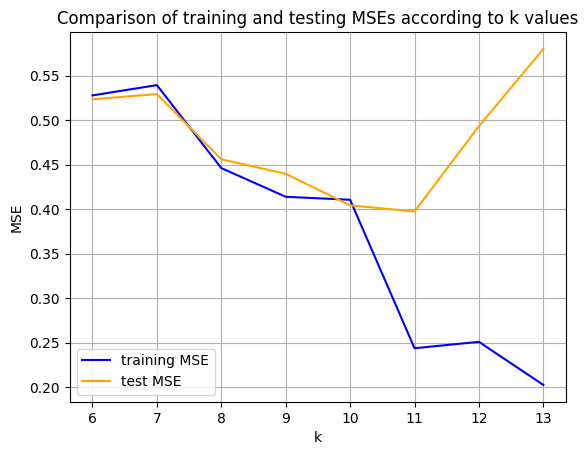

In [6]:
# 실습 4 - 실습 3에서 구한 선형 기저함수 모델의 평균제곱오차(MSE)를 훈련 집합과 테스트 집합에 대해 각각 구하고 그래프로 표시

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Gaussian Basis Function
def gaussian_basis(x, centers, rho):
    return np.exp(-0.5 * ((x - centers) / rho) ** 2)

# Gaussian Weights Calculation
def gaussian_weights(k, x, y):
    rho = ((max(x) - min(x)) / (k - 1))  # rho 계산
    centers = np.linspace(min(x), max(x), k)  # 중심 계산
    basis_functions = gaussian_basis(x[:, np.newaxis], centers, rho)  # 가우시안 함수 계산
    matrix = np.column_stack((basis_functions, np.ones(len(x))))  # 바이어스 항 추가
    weights = np.linalg.pinv(matrix.T @ matrix) @ matrix.T @ y  # 최적 가중치 계산
    y_predict = matrix @ weights
    mse = np.mean((y_predict - y) ** 2)  # MSE 계산
    return weights, mse

k_values = range(6, 14)
train_mse_values = []
test_mse_values = []

# # k 값을 기준으로 MSE 계산 및 그래프 표시
for k in k_values:
    # 훈련 데이터 MSE 계산
    train_weights, train_mse = gaussian_weights(k, train_age, train_height)
    train_mse_values.append(train_mse)
    
    # 훈련 데이터에서 훈련된 가중치를 사용하여 MSE 계산
    test_basis_functions = gaussian_basis(test_age[:, np.newaxis], np.linspace(min(train_age), max(train_age), k),
                                          (max(train_age) - min(train_age)) / (k - 1))
    test_matrix = np.column_stack((test_basis_functions, np.ones(len(test_age))))
    y_predict_test = test_matrix @ train_weights
    test_mse = np.mean((y_predict_test - test_height) ** 2)
    test_mse_values.append(test_mse)

# plot
plt.plot(k_values, train_mse_values, label='training MSE', color='blue')
plt.plot(k_values, test_mse_values, label='test MSE', color='orange')

plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Comparison of training and testing MSEs according to k values')
plt.grid()
plt.legend()

plt.show()

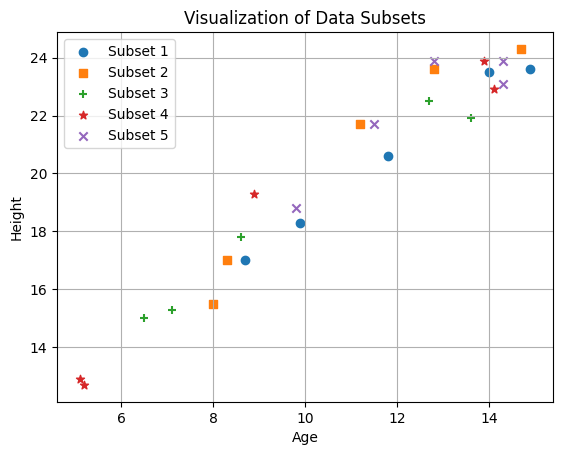

In [7]:
# 실습 5 - 전체 데이터를 차례로 5등분하여 5개의 부분집합으로 나누고,
# 각 집합의 데이터를 x축은 나이, y축은 키를 나타내는 2차원 평면에 서로 다른 모양의 마커로 표시

# 데이터 분할
data_size = raw_data.shape[0]
subset_size = data_size // 5  # 전체 데이터 크기를 5등분

# 데이터를 5개의 부분 집합으로 나누기
subsets = [raw_data[i * subset_size: (i + 1) * subset_size] for i in range(5)]

# 부분 집합 시각화 및 표시
plt.figure()
markers = ['o', 's', '+', '*', 'x']  # 각 부분집합을 구분하기 위한 다른 마커

for i, subset in enumerate(subsets):
    plt.scatter(subset['age'], subset['height'], marker=markers[i], label=f'Subset {i+1}')

plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Visualization of Data Subsets')
plt.legend()
plt.grid()
plt.show()

In [13]:
# 실습 6 - 실습 5에서 만든 다섯 개의 데이터 집합을 이용해 5겹 교차검증을 구현 
# 모델은 K=9일 때의 가우스함수를 이용한 선형 기저함수 모델을 사용
# 이를 위해 5개의 홀드아웃 검증을 설계하고 각 홀드아웃의 결과물 (매개변수, 일반화, 오차)를 구하기)

# Gaussian Weights Calculation -> 다시 만듬
def gaussian_weights(k, x, y):
    rho = ((max(x) - min(x)) / (k - 1))
    centers = np.linspace(min(x), max(x), k)
    basis_functions = gaussian_basis(x[:, np.newaxis], centers, rho)
    matrix = np.column_stack((basis_functions, np.ones(len(x))))
    weights = np.linalg.pinv(matrix.T @ matrix) @ matrix.T @ y
    return weights

# 5개의 부분집합으로 분할
data_size = raw_data.shape[0]
subset_size = data_size // 5  # 전체 데이터 크기를 5등분
subsets = [raw_data[i * subset_size: (i + 1) * subset_size] for i in range(5)]

# 5겹 교차검증 수행
k = 9  # 가우시안 기저 함수의 수

results = []

for i in range(5):
    # 검증 데이터와 훈련 데이터 분리
    validation_data = subsets[i]  # 1개의 부분집합을 검증 데이터로 사용
    train_data = pd.concat([s for j, s in enumerate(subsets) if j != i])  # 나머지 4개 부분집합을 훈련 데이터로 사용

    train_age = train_data['age'].to_numpy()
    train_height = train_data['height'].to_numpy()

    validation_age = validation_data['age'].to_numpy()
    validation_height = validation_data['height'].to_numpy()

    # 모델 학습
    weights = gaussian_weights(k, train_age, train_height)

    # 검증 데이터 예측
    validation_basis_functions = gaussian_basis(
        validation_age[:, np.newaxis], 
        np.linspace(min(train_age), max(train_age), k), 
        (max(train_age) - min(train_age)) / (k - 1)
    )
    
    validation_matrix = np.column_stack((validation_basis_functions, np.ones(len(validation_age))))
    y_predict_validation = validation_matrix @ weights  # 예측값

    # 검증 데이터의 MSE 계산
    validation_mse = np.mean((y_predict_validation - validation_height) ** 2) ** 0.5

    # 결과 저장
    results.append({
        "holdout": i + 1,
        "weights": weights,
        "validation_mse": validation_mse,
    })

# 결과 출력
for result in results:
    print(f"Holdout {result['holdout']}:")
    print(f"Parameters (Weights): {result['weights']}")
    print(f"Validation MSE: {result['validation_mse']:.5f}")
    print("-" * 50)

Holdout 1:
Parameters (Weights): [-23.27773784   8.46036298 -22.82681943   5.92008981 -13.70476057
  -1.92170106  -4.4006918   -4.09937563  -6.4250132   33.96748624]
Validation MSE: 1.36309
--------------------------------------------------
Holdout 2:
Parameters (Weights): [-8.95992641  6.05043947 -9.33234679  5.83480926 -3.33087033 -0.31618698
  4.52856969 -1.88903723  5.00044914 19.22266449]
Validation MSE: 0.90902
--------------------------------------------------
Holdout 3:
Parameters (Weights): [-42.45075815   4.27465609 -36.68523632   1.22808136 -30.16935684
  -1.69319305 -27.44140133   2.73127103 -31.63690077  57.87225316]
Validation MSE: 1.19657
--------------------------------------------------
Holdout 4:
Parameters (Weights): [ 38.594979   -10.01758909  41.86303039 -11.20861564  46.91526877
 -10.57723163  46.04739466  -9.52523718  46.23936352 -23.04483409]
Validation MSE: 12.38849
--------------------------------------------------
Holdout 5:
Parameters (Weights): [-21.8948326

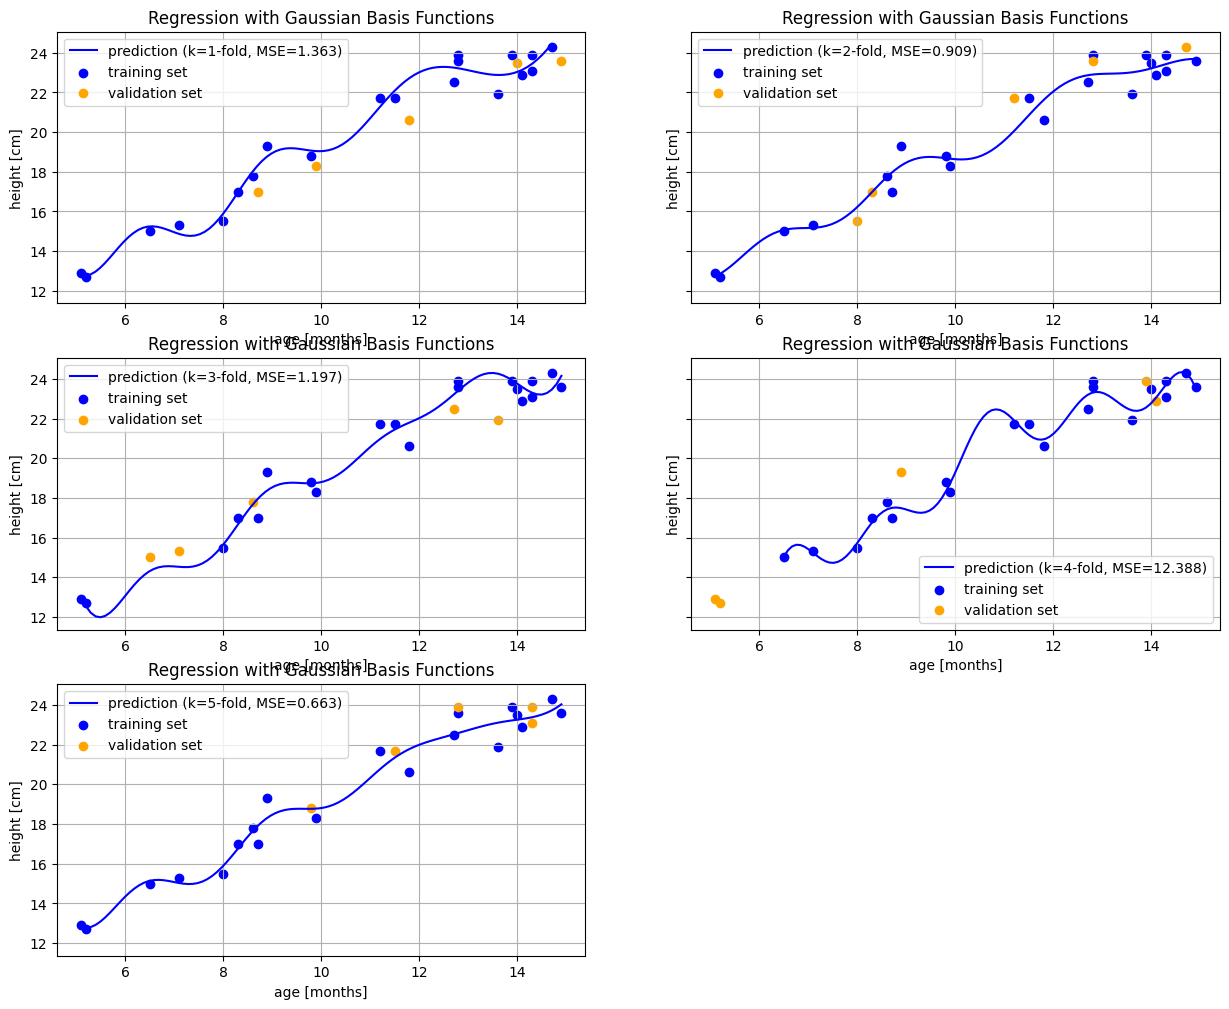

In [14]:
# 실습 7 - 실습 #6에서 각 홀드아웃의 결과로 생성된 선형 기저함수 모델을 각각의 훈련데이터, 검증데이터와 함께 그래프에 표시

# 3x2 서브플롯 생성
fig, axs = plt.subplots(3, 2, figsize=(15, 12), sharey=True)  # 3행 2열 서브플롯
axs = axs.flatten()  # 3x2 서브플롯을 평면으로 만듦

# 각 홀드아웃에 대해
for i in range(5):
    ax = axs[i]  # 서브플롯 순서
    validation_data = subsets[i]  # 검증 데이터
    train_data = pd.concat([s for j, s in enumerate(subsets) if j != i])  # 훈련 데이터

    train_age = train_data['age'].to_numpy()
    train_height = train_data['height'].to_numpy()

    validation_age = validation_data['age'].to_numpy()
    validation_height = validation_data['height'].to_numpy()

    # 모델 학습
    weights = gaussian_weights(k, train_age, train_height)

    # 전체 데이터에 대해 모델 예측
    full_age_range = np.linspace(min(train_age), max(train_age), 100)
    full_basis_functions = gaussian_basis(
        full_age_range[:, np.newaxis], 
        np.linspace(min(train_age), max(train_age), k), 
        (max(train_age) - min(train_age)) / (k - 1)
    )
    full_matrix = np.column_stack((full_basis_functions, np.ones(len(full_age_range))))
    full_predictions = full_matrix @ weights  # 모델 예측

    # 검증 데이터 예측
    validation_basis_functions = gaussian_basis(
        validation_age[:, np.newaxis], 
        np.linspace(min(train_age), max(train_age), k), 
        (max(train_age) - min(train_age)) / (k - 1)
    )
    
    validation_matrix = np.column_stack((validation_basis_functions, np.ones(len(validation_age))))
    y_predict_validation = validation_matrix @ weights  # 예측값

    # 검증 데이터의 MSE 계산
    validation_mse = np.mean((y_predict_validation - validation_height) ** 2) ** 0.5

    # 결과 저장
    results.append({
        "holdout": i + 1,
        "weights": weights,
        "validation_mse": validation_mse,
    })

    # 서브플롯에 그래프 그리기
    ax.plot(full_age_range, full_predictions, label=f"prediction (k={i + 1}-fold, MSE={validation_mse:.3f})", color='b')  # 모델 예측
    ax.scatter(train_age, train_height, label="training set", color='b')
    ax.scatter(validation_age, validation_height, label="validation set", color='orange')

    ax.set_title("Regression with Gaussian Basis Functions")
    ax.set_xlabel("age [months]")
    ax.set_ylabel("height [cm]")
    ax.grid(True)
    ax.legend()  # 범례 추가

# 여분 서브플롯 비움
axs[-1].axis("off")

plt.show()